In [1]:
%matplotlib inline

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import missingno

import warnings



In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

 lets look at each data and check if it is useful for our target 'SalesPrice'

In [4]:
df.shape


(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

we can see many missing values in some columns

### Basic Cleaning 

In [6]:
d = []

for col in df:
    null_values = df[col].isnull().sum()
    if null_values !=0:
        d.append([col,null_values])
        
d.sort(key=lambda k:k[1],reverse=True)

df_null = pd.DataFrame(d,columns=['col','null'])
df_null

,col,null
0,PoolQC,1453
1,MiscFeature,1406
2,Alley,1369
3,Fence,1179
4,FireplaceQu,690
5,LotFrontage,259
6,GarageType,81
7,GarageYrBlt,81
8,GarageFinish,81
9,GarageQual,81


Text(0, 0.5, 'null_values')

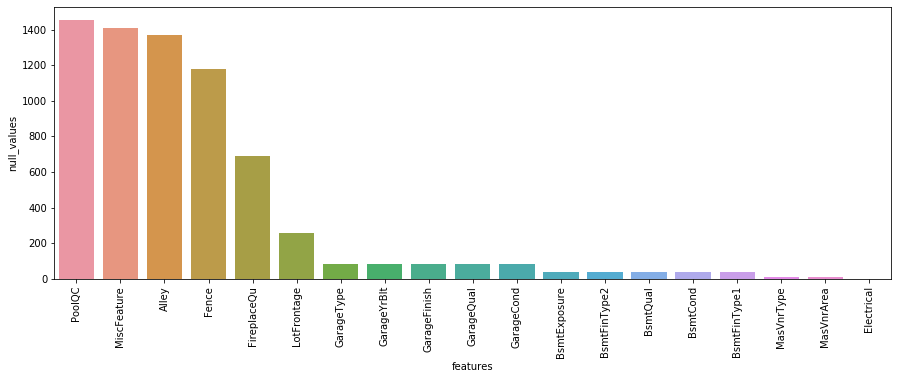

In [7]:
plt.figure(figsize=(15,5))
plt.xticks(rotation='90')

sns.barplot(x=df_null.col,y=df_null.null)
plt.xlabel('features')
plt.ylabel('null_values')

lets drop the 4 which are totally not of our use

In [8]:
dropped_col = []
for col in df:
    if df[col].isnull().sum()>1000:
        df = df.drop(col,axis=1)
        dropped_col.append(col)
        
dropped_col


['Alley', 'PoolQC', 'Fence', 'MiscFeature']

now lets look at our target variable sale price

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


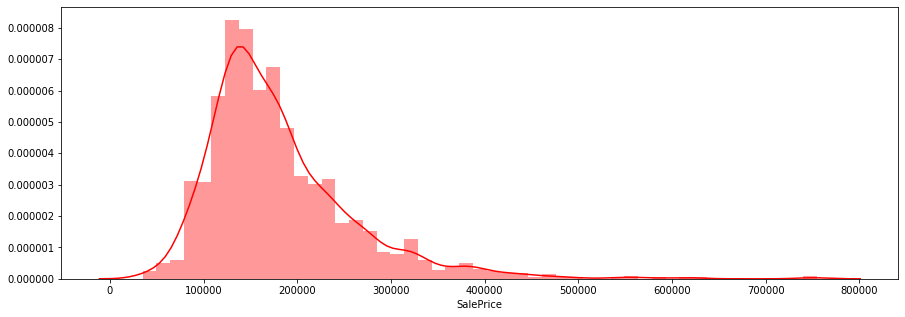

In [9]:
print(df['SalePrice'].describe())
plt.figure(figsize=(15,5))
sns.distplot(df['SalePrice'],color='r')


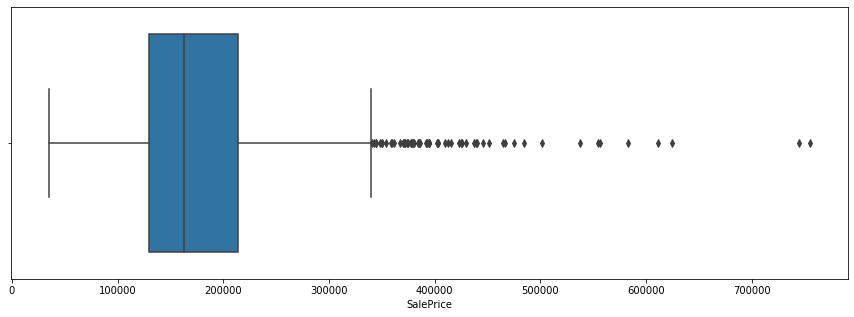

In [10]:
plt.figure(figsize=(15,5))
sns.boxplot(df.SalePrice)

clearly the prices are right skewed and there are outliers above 500000

### Numerical Data
lets take only numerical values

In [11]:
df_num = df.select_dtypes(include=['float','int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


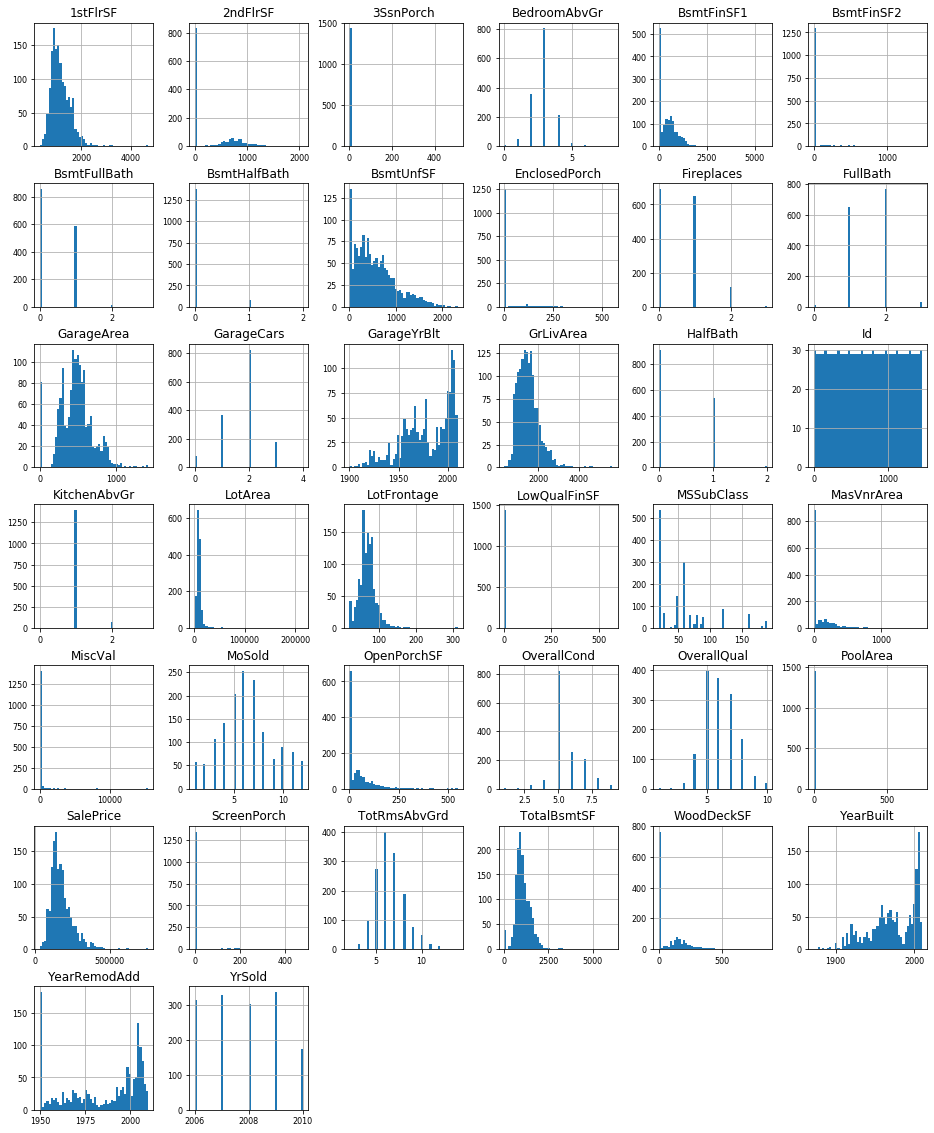

In [12]:
df_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)
plt.show()

we can see fetuers like 1stflrsf,GrlivArea,Lotfrontage and TotalBsmtsf show similar distribution as SalePrice

### relationship of SalePrice with numerical variables

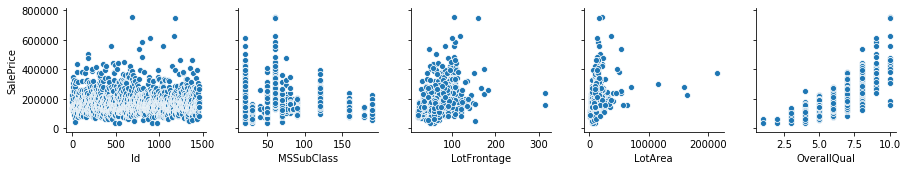

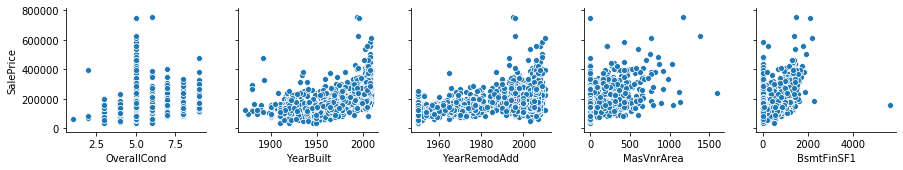

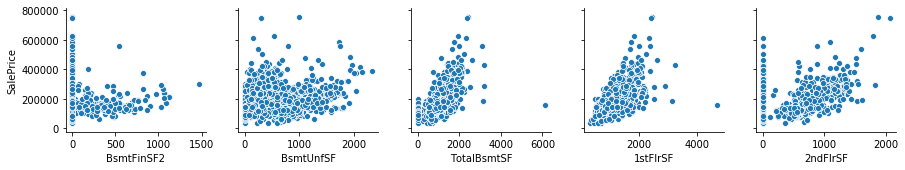

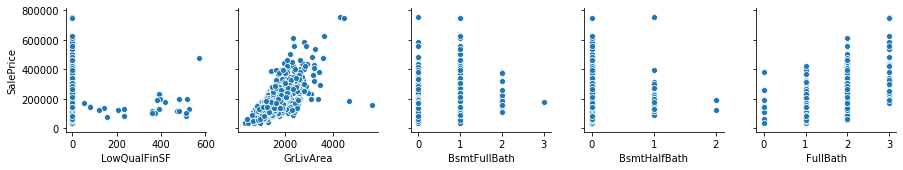

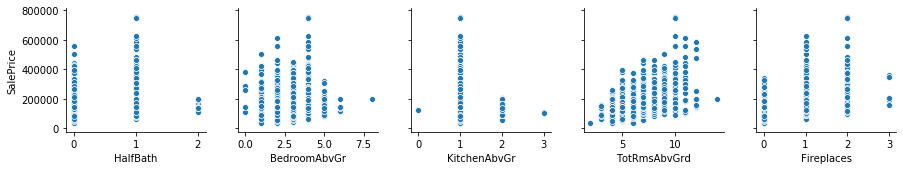

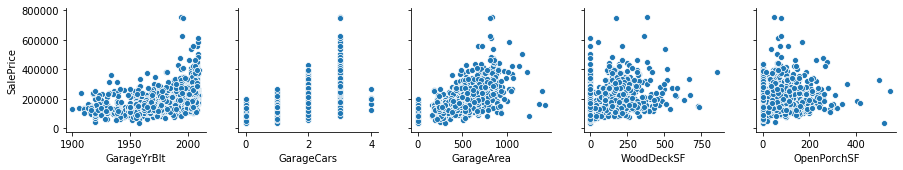

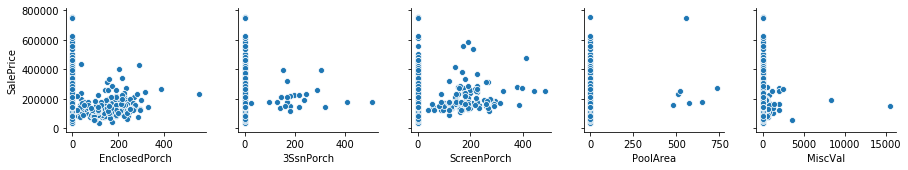

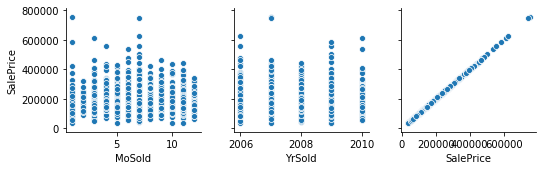

In [13]:
#lets have scatterplots
for i in range(0,len(df_num.columns),5):
    sns.pairplot(x_vars=df_num.columns[i:i+5],y_vars='SalePrice',data=df_num)
plt.show()

We see that most of them (GrLivArea,1stFlrsf,TotalBsmtsf..) seems to have Linear relationship with SalePrice 

### correaltion

In [14]:
# how variables correlate with SalePrice
df_num.corr()['SalePrice'][:-1]

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64

### strongly correlated variables with SalePrice

In [15]:
strongly_corr = df_num.corr()['SalePrice'][:-1]
strongly_corr  = strongly_corr[abs(strongly_corr)>0.5].sort_values(ascending=False) # since series dont have sort()
print('there are', len(strongly_corr),' strongly correlated variables ')
strongly_corr

there are 10  strongly correlated variables 


OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Now we have strongly correlated values and now we know what feture we need to focus on
but since there are outliers the correlated values are not perfect
so we check again after removing outliers

In above paiplot we can see that there are many data points located at x=0 
which may indicate the absence of such feature in house
So now lets remove these 0 values and repeat the process of finding correlated values:

In [16]:
individual_features_df = []

for i in range(0,len(df_num.columns)-1):     #since we dont want SalePrice
    
    temp_df = df_num[[df_num.columns[i],'SalePrice']]
    
    without_zero = temp_df[df_num.columns[i]] != 0
    
    temp_df = temp_df[without_zero]
    
    individual_features_df.append(temp_df)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}

# all_correlations.sort(lambda k:k[1]) sinse dict ha no sort we will import operater
import operator

all_correlations = sorted(all_correlations.items(),key = operator.itemgetter(1),reverse=True)# decresing way
all_correlations

[('OverallQual', 0.7909816005838047),
 ('GrLivArea', 0.7086244776126511),
 ('2ndFlrSF', 0.6733048324568383),
 ('GarageCars', 0.6370954062078953),
 ('TotalBsmtSF', 0.6096808188074366),
 ('GarageArea', 0.6084052829168343),
 ('1stFlrSF', 0.6058521846919166),
 ('FullBath', 0.5745626737760816),
 ('TotRmsAbvGrd', 0.5337231555820238),
 ('YearBuilt', 0.5228973328794967),
 ('YearRemodAdd', 0.5071009671113867),
 ('GarageYrBlt', 0.48636167748786213),
 ('BsmtFinSF1', 0.4716904265235731),
 ('MasVnrArea', 0.4340902197568926),
 ('LotFrontage', 0.35179909657067854),
 ('LowQualFinSF', 0.3000750165550133),
 ('LotArea', 0.2638433538714063),
 ('ScreenPorch', 0.25543007954878405),
 ('EnclosedPorch', 0.2412788363011751),
 ('BsmtFinSF2', 0.19895609430836586),
 ('WoodDeckSF', 0.19370601237520677),
 ('BedroomAbvGr', 0.18093669310849045),
 ('BsmtUnfSF', 0.16926100049514192),
 ('Fireplaces', 0.1216605842136395),
 ('MiscVal', 0.08896338917298924),
 ('OpenPorchSF', 0.08645298857147708),
 ('3SsnPorch', 0.0639324325

lets find again strongly correlated values

In [17]:
strongly_corr = [key for key,value in all_correlations if abs(value)>=0.5]
print('there are',len(strongly_corr),'strongly correlated features')
strongly_corr


there are 11 strongly correlated features


['OverallQual',
 'GrLivArea',
 '2ndFlrSF',
 'GarageCars',
 'TotalBsmtSF',
 'GarageArea',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

we saw correlation of salesprice with features and found that 11 fetures matters most lets see them again

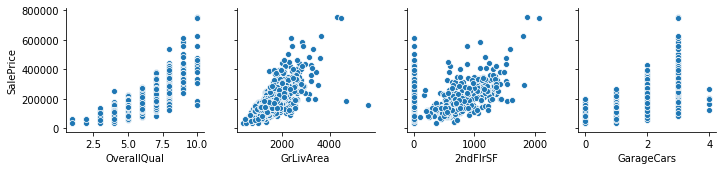

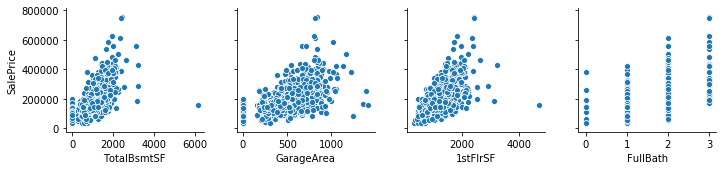

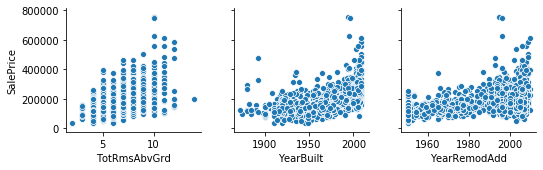

In [18]:

for i in range(0,len(strongly_corr),4):
    sns.pairplot(x_vars=strongly_corr[i:i+4],y_vars='SalePrice',data=df_num)


we can see some outliers in GrLivArea , TotalBsmtSF ,1stFlsf 
 we can delete them

In [19]:
df[df['GrLivArea']>4500]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,...,0,0,0,0,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000


In [23]:
#always remeber we can drop only through index
df = df.drop(df[df['Id']==524].index)
df = df.drop(df[df['Id']==1298].index)

In [27]:
df[df['TotalBsmtSF']>4500]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000


In [28]:
df = df.drop(df[df['Id']==1299].index)

lets have a look at all of them

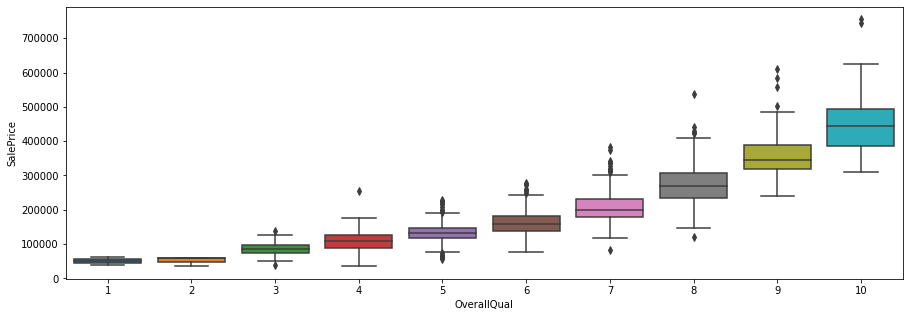

In [67]:
plt.figure(figsize=(15,5))
sns.boxplot(x='OverallQual',y='SalePrice',data=df)

this is clear linear relation , more the price more OverallQual: Overall material and finish quality

Lets have a  at our look
### catagorical data

In [70]:
#df.select_dtype(include=['float','int'])
dt = df.dtypes
dt.value_counts()

object     39
int64      35
float64     3
dtype: int64

In [72]:
df_cat = df.select_dtypes(include = ['O'])
print(len(df_cat.columns),'catagoriacal dtypes are there')
df_cat.columns

39 catagoriacal dtypes are there


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [73]:
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


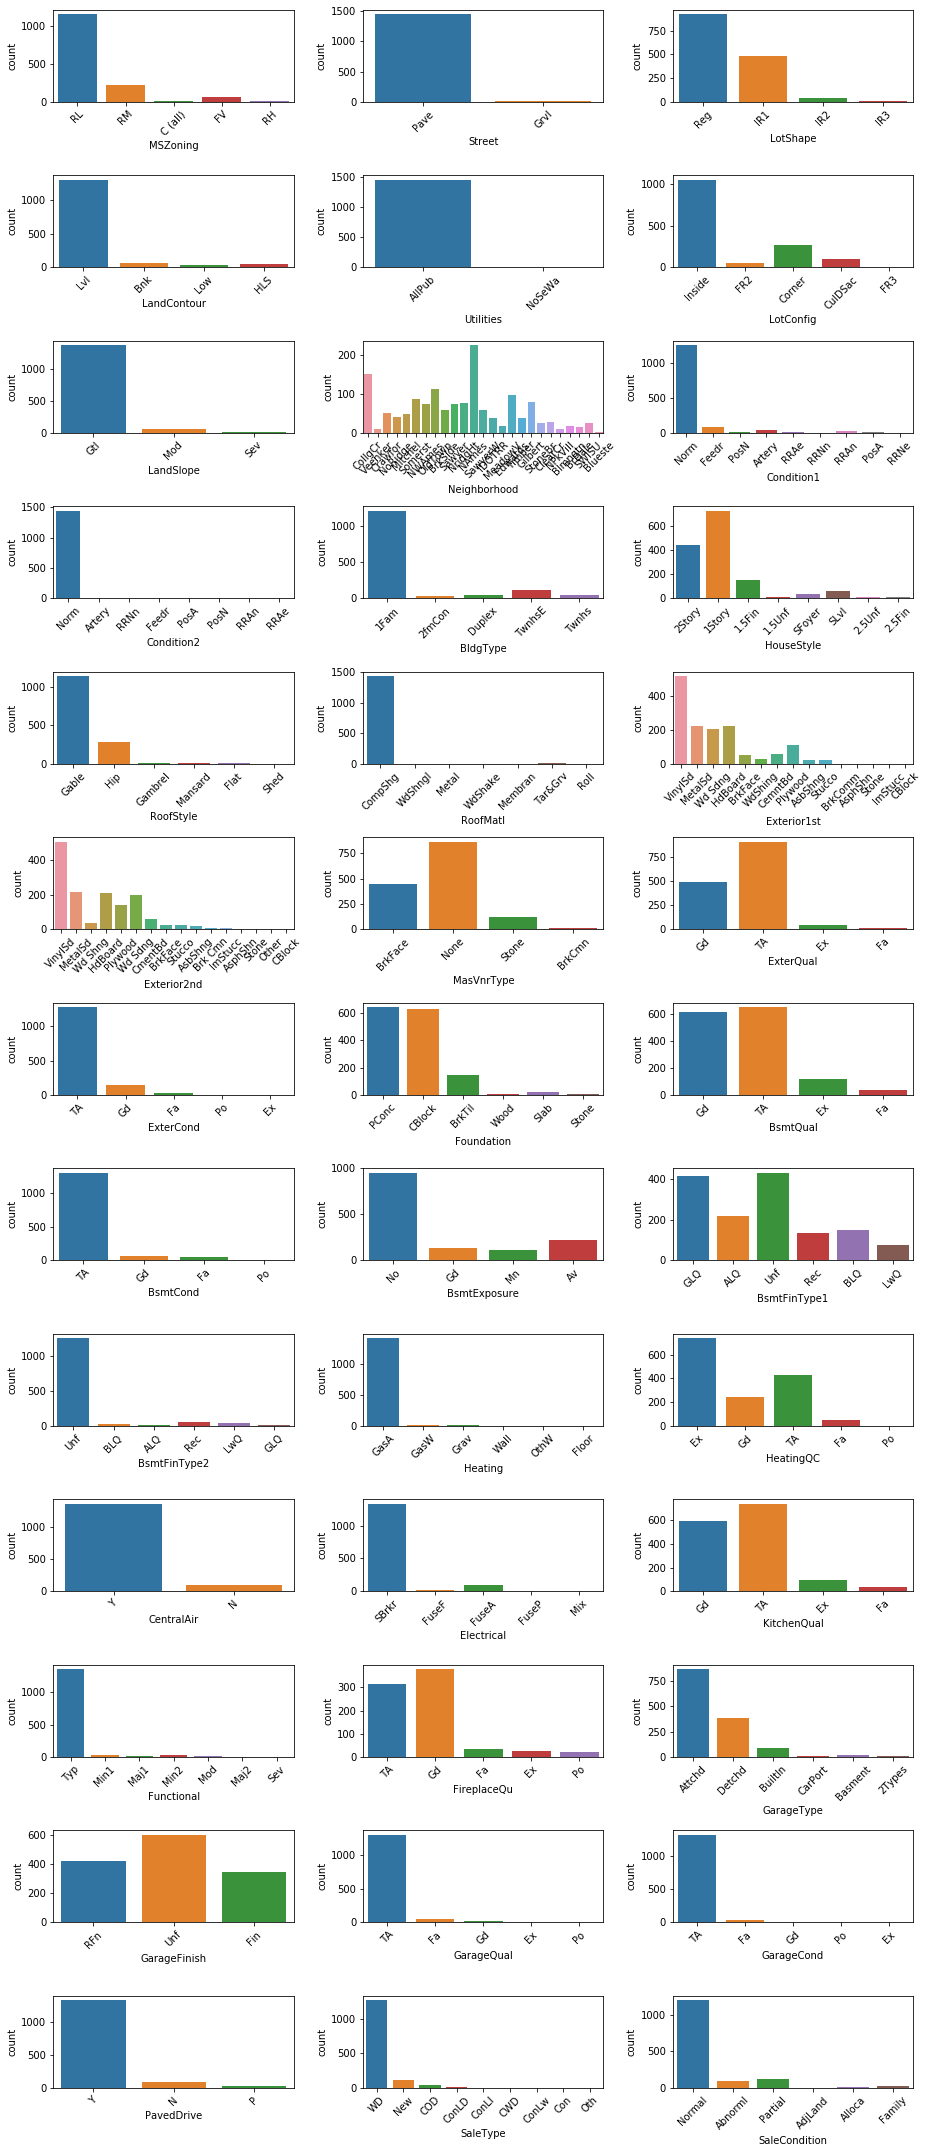

In [105]:
#lets have a look at their distribution 
fig ,axes = plt.subplots(round(len(df_cat.columns)/3),3,figsize=(13,30))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(),rotation=45)
        sns.countplot(x=df_cat.columns[i],data=df_cat,ax=ax)

fig.tight_layout()# to have proper padding
plt.show()

we can see many of the features like Utility,Street,condition2,roofmatl... makes no sense in analysis
### lets look some important of them

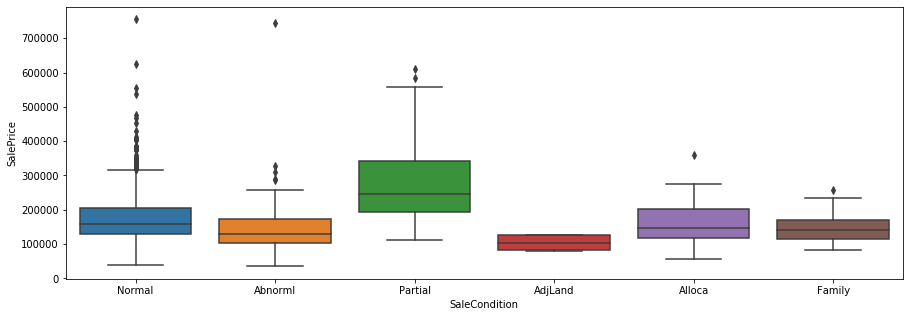

In [107]:
plt.figure(figsize=(15,5))
sns.boxplot(x='SaleCondition',y='SalePrice',data=df)

we see that Partial condition (Partial	Home was not completed when last assessed (associated with New Homes))
of sale has high sale price

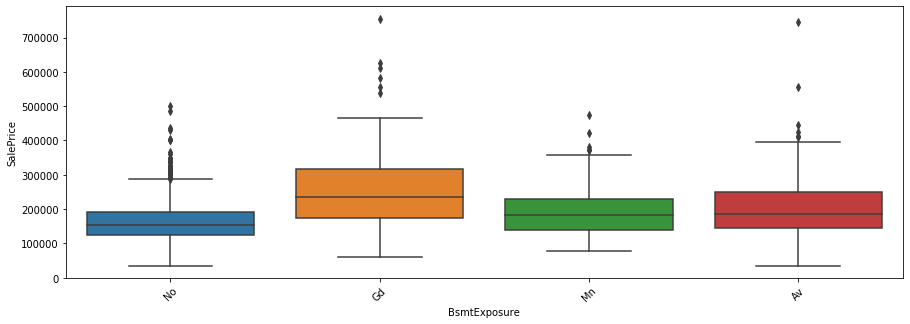

In [110]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.boxplot(x='BsmtExposure',y='SalePrice',data=df)

house with good basement(Gd) exposure cost high (this is an obvious thing)

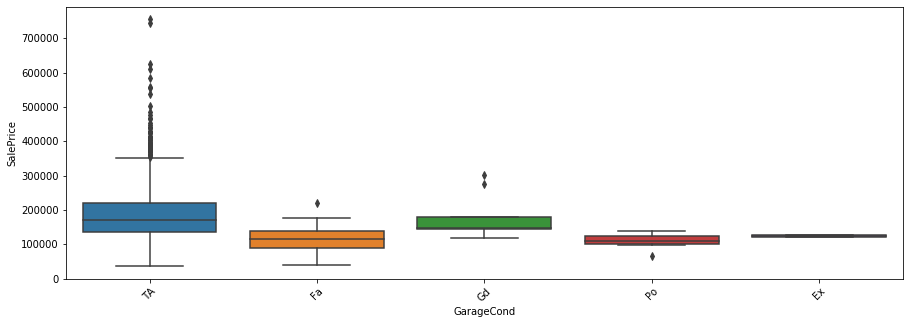

In [111]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.boxplot(x='GarageCond',y='SalePrice',data=df)

we see garage with average condition(TA) have a good price